# Slack Queries Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [10]:
df = pd.read_excel('F:\Board Infinity\hackathon 11.3\Dataset.xlsx')

df.head(5)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase
0,6403,Working Professionals,Fullstack Program,Closed,2021-05-14 01:09:00,2021-05-14 19:04:00,2021-05-14 08:51:07,trial phase
1,6415,Working Professionals,Backend Program,Duplicate,2021-05-14 10:12:00,2021-05-14 11:23:00,NaT,trial phase
2,6420,Working Professionals,Fullstack Program,Closed,2021-05-14 11:46:00,2021-05-16 00:09:00,2021-05-14 18:14:51,trial phase
3,6402,Student,Fullstack Program,Closed,2021-05-14 01:08:00,2021-05-14 19:04:00,2021-05-14 14:45:04,fullstack-phase-1
4,6423,Working Professionals,Fellowship Program,Closed,2021-05-14 12:17:00,2021-05-14 20:39:00,2021-05-14 12:21:13,trial phase


# Q-1 Check the Datatypes and convert relevant columns to Date and Time format.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Ticket Id              476 non-null    int64         
 1   Student or WP          476 non-null    object        
 2   Program Name           476 non-null    object        
 3   Status (Ticket)        476 non-null    object        
 4   Created Time (Ticket)  476 non-null    datetime64[ns]
 5   Ticket Closed Time     476 non-null    object        
 6   First Response Time    366 non-null    datetime64[ns]
 7   Project Phase          476 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 20.5+ KB


In [12]:
#Column 'Ticket Closed Time' is objective type which is suppose to be datetime

df['Ticket Closed Time'] = pd.to_datetime(df['Ticket Closed Time'],errors ='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Ticket Id              476 non-null    int64         
 1   Student or WP          476 non-null    object        
 2   Program Name           476 non-null    object        
 3   Status (Ticket)        476 non-null    object        
 4   Created Time (Ticket)  476 non-null    datetime64[ns]
 5   Ticket Closed Time     468 non-null    datetime64[ns]
 6   First Response Time    366 non-null    datetime64[ns]
 7   Project Phase          476 non-null    object        
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 22.4+ KB


# Q-2 Fill Missing Values with Appropriate Method.

In [13]:
df.isnull().sum().sort_values(ascending=False)

First Response Time      110
Ticket Closed Time         8
Project Phase              0
Created Time (Ticket)      0
Status (Ticket)            0
Program Name               0
Student or WP              0
Ticket Id                  0
dtype: int64

In [16]:
df['First Response Time'].fillna(df['Ticket Closed Time'], inplace = True)
df.isnull().sum().sort_values(ascending=False)

Ticket Closed Time       8
First Response Time      1
Project Phase            0
Created Time (Ticket)    0
Status (Ticket)          0
Program Name             0
Student or WP            0
Ticket Id                0
dtype: int64

In [21]:
df = df.dropna(how='any')
df.isnull().sum()


Ticket Id                0
Student or WP            0
Program Name             0
Status (Ticket)          0
Created Time (Ticket)    0
Ticket Closed Time       0
First Response Time      0
Project Phase            0
dtype: int64

# Q-3 Check how many Students and Work Professionals are raising queries, who’s queries are more.

In [22]:
# Creating sepaarte series 
ST = df.groupby('Student or WP').count().iloc[:,0]
ST

Student or WP
Student                  145
Working Professionals    323
Name: Ticket Id, dtype: int64

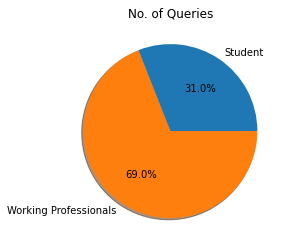

In [23]:
plt.pie(ST,autopct='%1.1f%%', shadow='True', labels=ST.index)
plt.title('No. of Queries')
plt.show()

# Q4 What is the Average time taken to respond to a query?

In [54]:
# first calculating the time required to respond the query and avg value calculated

Output = (df['First Response Time']-df['Created Time (Ticket)']).astype('timedelta64[h]').mean()

print('Average Time Taken to Respond Query:',round(Output,2), 'Hrs')

Average Time Taken to Respond Query: 7.33 Hrs


# Q 5. List down top 10 queries that took longest time to resolve.

In [59]:
# adding one column of time difference between creating & closing Query

df['diff'] = ((df['Ticket Closed Time']-df['Created Time (Ticket)']).astype('timedelta64[h]'))

df.sort_values('diff',ascending=False).head(10).reset_index()

<ipython-input-59-7ccb0ffc04d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = ((df['Ticket Closed Time']-df['Created Time (Ticket)']).astype('timedelta64[h]'))


,index,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase,Avg_Time,diff
0,41,6525,Student,Fullstack Program,Closed,2021-05-14 23:03:00,2021-05-21 17:53:00,2021-05-15 11:38:05,fullstack-phase-1,0 days 12:35:05,162.0
1,179,6748,Working Professionals,Backend Program,Closed,2021-05-16 20:49:00,2021-05-21 17:44:00,2021-05-18 18:16:56,backend-phase-3,1 days 21:27:56,116.0
2,7,6405,Student,Fullstack Program,Closed,2021-05-14 01:23:00,2021-05-18 19:15:00,2021-05-14 14:15:15,fullstack-phase-2,0 days 12:52:15,113.0
3,39,6505,Working Professionals,Backend Program,Closed,2021-05-14 20:38:00,2021-05-19 10:54:00,2021-05-14 20:44:37,backend-phase1,0 days 00:06:37,110.0
4,225,6776,Working Professionals,Backend Program,Closed,2021-05-17 10:26:00,2021-05-21 21:39:00,2021-05-18 18:16:31,fullstack-phase-1,1 days 07:50:31,107.0
5,65,6508,Working Professionals,Backend Program,Closed,2021-05-14 20:40:00,2021-05-18 22:11:00,2021-05-14 22:35:49,system-issues,0 days 01:55:49,97.0
6,102,6633,Student,Fullstack Program,Closed,2021-05-16 12:09:00,2021-05-20 11:24:00,2021-05-16 20:20:54,fullstack-phase-4,0 days 08:11:54,95.0
7,113,6642,Working Professionals,Backend Program,Closed,2021-05-16 12:10:00,2021-05-20 11:24:00,2021-05-16 12:11:11,backend-phase2,0 days 00:01:11,95.0
8,9,6411,Working Professionals,Backend Program,Closed,2021-05-14 02:15:00,2021-05-17 22:19:00,2021-05-14 11:54:30,backend-phase2,0 days 09:39:30,92.0
9,47,6548,Student,Fullstack Program,Closed,2021-05-15 10:38:00,2021-05-18 19:15:00,2021-05-15 12:28:29,trial phase,0 days 01:50:29,80.0


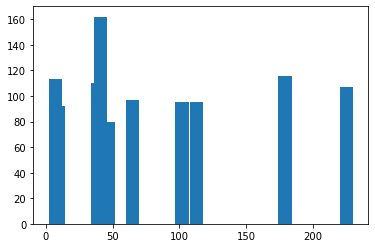

In [277]:
y = pd.DataFrame(Long.sort_values(0,ascending = False).head(10))
y.columns=['Longer Time']

plt.bar(y.index, y['Longer Time'], width = 10)

plt.show()

# Q 6 Which Phase of Project is having highest Queries?

In [396]:
Phase = df.groupby('Project Phase').count().iloc[:,0].sort_values(ascending=False).to_frame().reset_index()

start = "\033[1m"
end = "\033[0;0m"

print(start + Phase.iloc[0,0]+ end + ' is having highest Queries.')

fullstack-phase-2 is having highest Queries


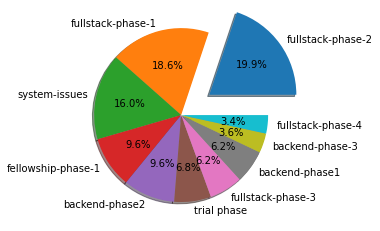

In [65]:
Ph = (df.groupby('Project Phase').count().iloc[:,0].sort_values(ascending=False))
explode=[0.4,0,0,0,0,0,0,0,0,0]

plt.pie(Ph,autopct='%1.1f%%', labels = Ph.index,shadow='True', explode = explode)

plt.show()

# Q-7  Which project phase queries are taking a long time to resolve?

In [66]:
# adding new colum of time required to resolve query

df['Long Time'] = (df['Ticket Closed Time']-df['Created Time (Ticket)']).astype('timedelta64[h]')

# group it by project phase & convert into dataframe
#checking for mean value
df.groupby(by = 'Project Phase').mean('Long Time').reset_index().sort_values("Long Time",ascending = False).head(1)


<ipython-input-66-4c16ecd0868b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Long Time'] = (df['Ticket Closed Time']-df['Created Time (Ticket)']).astype('timedelta64[h]')


,Project Phase,Ticket Id,diff,Long Time
7,fullstack-phase-4,6733.125,33.3125,33.3125


In [68]:
# checking for max value 
max = df.groupby(by = 'Project Phase').mean('Long Time').reset_index().sort_values("Long Time",ascending = False).iloc[0,0]

# Printing Answer
start = "\033[1m"
end = "\033[0;0m"

print( start + max + end +' queries are taking long time to resolve')

fullstack-phase-4 queries are taking long time to resolve


<AxesSubplot:ylabel='Long Time'>

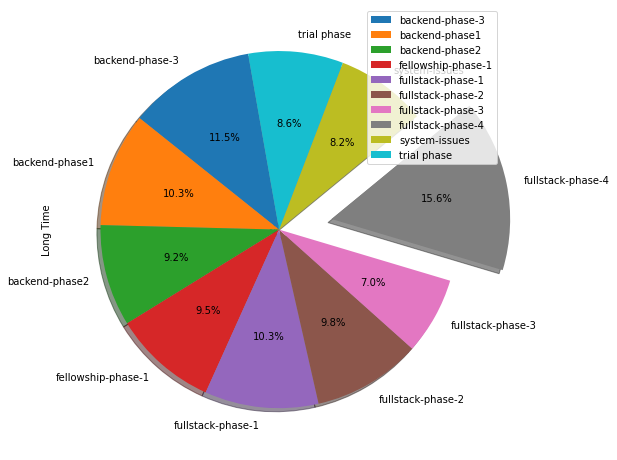

In [72]:
Px = df.groupby(by = 'Project Phase').mean('Long Time').reset_index().sort_values("Long Time",ascending = False)

explode = [0,0,0,0,0,0,0,0.3,0,0]
Px.groupby(['Project Phase']).max('Long Time').plot(kind='pie', y='Long Time', 
            shadow = True,
            figsize=(8,10), autopct='%1.1f%%',startangle = 100,
            explode = explode)

# Q-8 On which day highest queries were resolved?

In [73]:
# finding the date on which more number of queries were closed
abs = (df.groupby('Ticket Closed Time').count().iloc[:,0].sort_values(ascending=False)).to_frame().reset_index()

# printing values
start = "\033[1m"
end = "\033[0;0m"

print('On '+ start + abs.iloc[0,0].strftime('%d/%m/%Y')+ end +' highest queries were resolved.')

On 19/05/2021 highest queries were resolved.


# Q-9 Which phase queries are easier to resolve?

In [74]:
# checking for max value 
min = df.groupby(by = 'Project Phase').mean('Long Time').reset_index().sort_values("Long Time",ascending = True).iloc[0,0]

# Printing Answer
start = "\033[1m"
end = "\033[0;0m"

print( start + min + end +' queries are taking less time to resolve.')

fullstack-phase-3 queries are taking less time to resolve.


<AxesSubplot:ylabel='Long Time'>

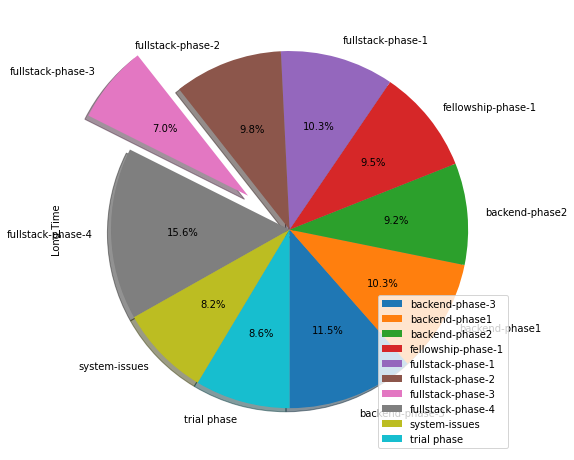

In [80]:
Px = df.groupby(by = 'Project Phase').mean('Long Time').reset_index().sort_values("Long Time",ascending = True)

explode = [0,0,0,0,0,0,0.3,0,0,0]
Px.groupby(['Project Phase']).max('Long Time').plot(kind='pie', y='Long Time', 
            shadow = True,
            figsize=(8,10), autopct='%1.1f%%',startangle = -90,
            explode = explode)

# Conclusion

1. Working professionals have more queries.

2. Fullstack Program has more numbers of Queries compare to other two categories.

In [101]:
PN = df.groupby(by ='Program Name').count().sort_values('Ticket Id',ascending=False).iloc[:,0]
PN.reset_index()

,Program Name,Ticket Id
0,Fullstack Program,238
1,Backend Program,176
2,Fellowship Program,54


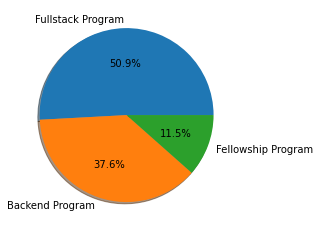

In [99]:
PN = df.groupby(by ='Program Name').count().sort_values('Ticket Id',ascending=False).iloc[:,0]

plt.pie(PN, autopct='%1.1f%%', labels = PN.index, shadow='True')

plt.show()

3. Nearly 73 % queries were Closed & resolved, 15 % queries are duplicated & 10 %  queries were deleted.

In [120]:
Status = df.groupby('Status (Ticket)').count().iloc[:,0]
Status

Status (Ticket)
Closed       332
Deleted       50
Duplicate     73
Fullstack      1
Resolved      12
Name: Ticket Id, dtype: int64

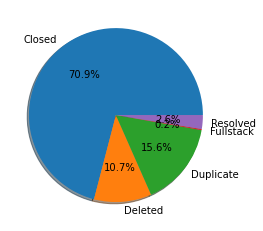

In [117]:
Status = df.groupby('Status (Ticket)').count().iloc[:,0]

plt.pie(Status, autopct='%1.1f%%', labels = Status.index, shadow='True')

plt.show()